In [2]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from heapq import *
import matplotlib.cm as cmap
import matplotlib.colors as colors
import random
from matplotlib.animation import FuncAnimation
from numba import jit


In [3]:

@jit(nopython=True)
def get_neighbors(grid, i, j):
    return (grid[(i - 1) % grid.shape[0], j],  # up
            grid[(i + 1) % grid.shape[0], j],  # down
            grid[i, (j - 1) % grid.shape[1]],  # left
            grid[i, (j + 1) % grid.shape[1]])

@jit(nopython=True)
def delta_e(spin, neighbors):
    return 2 * spin * (neighbors[0] + neighbors[1] + neighbors[2] + neighbors[3])

@jit(nopython=True)
def metropolis(grid, i, j, T):
    neighbors = get_neighbors(grid, i, j)
    dE = delta_e(grid[i, j], neighbors)
    
    P_p_m = min(1, np.exp(-dE / T))

    if dE < 0:
        grid[i, j] *= -1
    elif rng.rand() < P_p_m:
        grid[i, j] *= -1
    
    return grid
    


In [16]:
NX = 150
NY = 150
J = 1
N_PER_TEMP = 40 * NX * NY
TEMP_START = 4
TEMP_END = 0.1
TEMP_FACTOR = 0.98
FRAMES = 150

grid_size = (NX, NY)
spins = np.random.choice([-1, 1], size=grid_size)


@jit
def one_frame(grid , T): 

    for _ in range(N_PER_TEMP):
            i, j = np.random.randint(0, NX), np.random.randint(0, NY)
            metropolis(grid, i, j, T)

    return grid 



def generate_sim(grid, frames ):
    
    sim_grid = np.zeros((frames, *grid.shape))
    index = 0

    for frame in range(frames):
        T = max(TEMP_END, TEMP_START * (TEMP_FACTOR ** frame))
        
        sim_grid[index] = one_frame(grid, T)
        index += 1

    return sim_grid


    
data = generate_sim(spins, FRAMES)



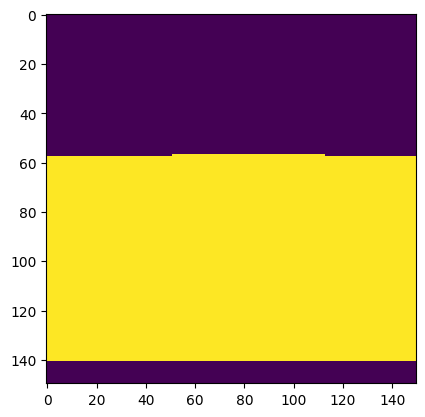

In [17]:


fig, ax = plt.subplots()
im = ax.imshow(data[0], cmap='viridis', interpolation='nearest')

def update(frame):
    im.set_array(data[frame])
    return [im]

ani = FuncAnimation(fig, update, frames=FRAMES, interval=50, blit=True)

ani.save('ising.mp4', writer='ffmpeg', fps=30)



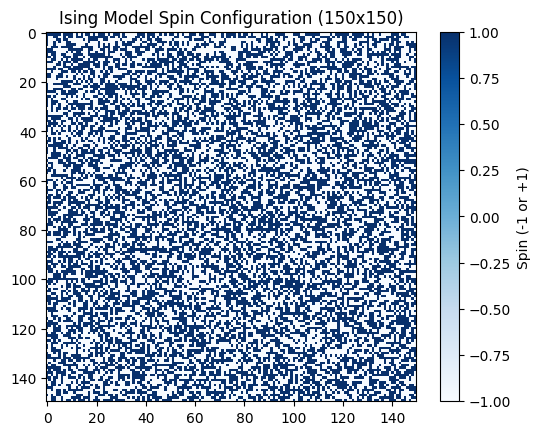

In [8]:
plt.imshow(spins, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Spin (-1 or +1)")
plt.title("Ising Model Spin Configuration (150x150)")
plt.show()